# Data Retrieving

In [ ]:
import pandas as pd

In [ ]:
heart_data = pd.read_csv("heart_failure_clinical_records_dataset.csv", sep=",", decimal = ".") 

In [ ]:
heart_data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
heart_data.shape

(299, 13)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [ ]:
heart_data.index

RangeIndex(start=0, stop=299, step=1)

# Data Preparation

In [ ]:
import matplotlib.pyplot as plt

##### Age


In [ ]:
# Sanity check
mask_1 = (heart_data['age'] > 90) | (heart_data['age'] < 0 ) 
heart_data.loc[mask_1, 'age']

26    95.0
30    94.0
55    95.0
Name: age, dtype: float64

In [ ]:
# min value of age
heart_data['age'].min(axis=0)

40.0

In [ ]:
# max value of age
heart_data['age'].max(axis=0)

95.0

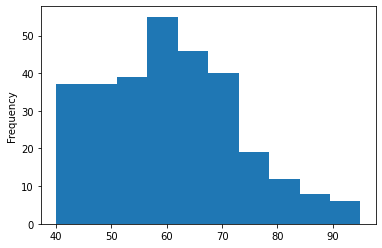

In [ ]:
# distribution of age
heart_data['age'].plot(kind='hist', bins = 10)

##### Anaemia

In [ ]:
# Check for bad values
heart_data['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [ ]:
# observe mean age of patients with and without anemia 
heart_data.groupby(['anaemia']).mean()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,,,,,,,,,,,,
0,59.923529,742.788235,0.423529,37.758824,0.335294,267082.215647,1.346941,136.464706,0.688235,0.364706,139.805882,0.294118
1,62.033597,369.736434,0.410853,38.511628,0.372093,258450.186744,1.455736,136.837209,0.596899,0.263566,117.682171,0.356589


In [ ]:
# compare death number in patients with and without anemia
# to analyse if anemia would have any role to play in death 
# 46 people with anaemia died
mask_4 = heart_data['anaemia'] == 1 
heart_data[mask_4]['DEATH_EVENT'].value_counts()

0    83
1    46
Name: DEATH_EVENT, dtype: int64

In [ ]:
# convert the death number in anemic patients to %
46/(46+83)

0.35658914728682173

In [ ]:
# 50 people who didn't have anaemia died
mask_5 = heart_data['anaemia'] == 0 
heart_data[mask_5]['DEATH_EVENT'].value_counts()

0    120
1     50
Name: DEATH_EVENT, dtype: int64

In [ ]:
50/(50+120)

0.29411764705882354

##### creatinine_phosphokinase

In [ ]:
# min value
heart_data['creatinine_phosphokinase'].min(axis= 0)

23

In [ ]:
# max value
heart_data['creatinine_phosphokinase'].max(axis= 0)

7861

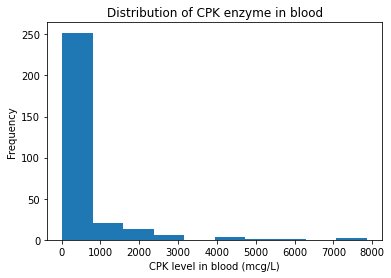

In [ ]:
# histogram distribution
heart_data['creatinine_phosphokinase'].plot(kind='hist')
plt.title("Distribution of CPK enzyme in blood")
plt.xlabel('CPK level in blood (mcg/L)')
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 7 observation with unusual high values of CPK
mask = heart_data['creatinine_phosphokinase'] > 3500
heart_data[mask].shape

(7, 13)

##### Diabetes

In [ ]:
# check bad values
heart_data['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

##### ejection_fraction

In [ ]:
# Sanity Check

mask_6 = (heart_data['ejection_fraction'] > 100) | (heart_data['ejection_fraction']< 0)
heart_data[mask_6]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [ ]:
# min value
heart_data['ejection_fraction'].min(axis=0)

14

In [ ]:
# max value
heart_data['ejection_fraction'].max(axis=0)

80

##### High Blood Pressure

In [ ]:
# check for bad values
heart_data['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [ ]:
df = heart_data.iloc[:,6:-1]

# Checking for missing values
a = df.describe().loc['count']
missing_val_col = a.loc[a<299].keys()
missing_val_col

Index([], dtype='object')

In [ ]:
# Checking for negative values
b = df.describe().loc['min']
negative_val_col = b.loc[b<0].keys()
negative_val_col

Index([], dtype='object')

In [ ]:
# Verifying if binary columns have abrupt values or not
binaryCols = []
nonBinaryCols = []
for i in range(0,len(df.columns)):
    if len(df.iloc[:,i].unique())==2:
        binaryCols.append(df.columns[i])
    else: nonBinaryCols.append(df.columns[i])
        
print(binaryCols)
print(nonBinaryCols)

['sex', 'smoking']
['platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [ ]:
df['sex'].loc[df['sex']==1].count()

194

In [ ]:
for x in nonBinaryCols:
    print("\n\n",df[x].describe())



 count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64


 count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64


 count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64


 count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64


In [ ]:
# Colummn 'platelets' and 'serum_creatinine' seem to have outliers
df[['platelets', 'serum_creatinine']]

,platelets,serum_creatinine
0,265000.00,1.9
1,263358.03,1.1
2,162000.00,1.3
3,210000.00,1.9
4,327000.00,2.7
...,...,...
294,155000.00,1.1
295,270000.00,1.2
296,742000.00,0.8
297,140000.00,1.4


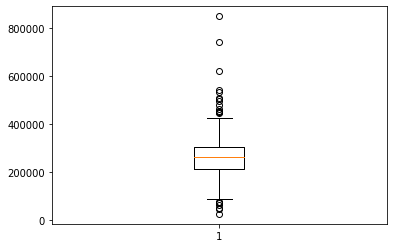

In [ ]:
platelets = df['platelets']
import matplotlib.pyplot as plt
plateletsPlot = plt.boxplot(platelets)

In [ ]:
whiskerList = [x.get_ydata()[1] for x in plateletsPlot['whiskers']]
plateletsUpperLimit = whiskerList[1]
plateletsLowerLimit = whiskerList[0]

In [ ]:
print(platelets.loc[platelets>plateletsUpperLimit].count(),",",platelets.loc[platelets<plateletsLowerLimit].count())

14 , 7


In [ ]:
df.loc[(df['platelets']>plateletsUpperLimit) | (df['platelets']<plateletsLowerLimit),'platelets'] = platelets.median()

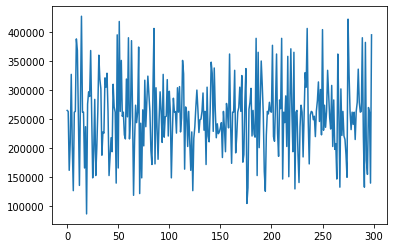

In [ ]:
plt.plot(platelets)

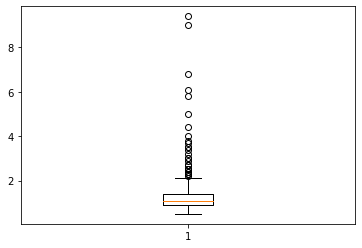

In [ ]:
serum = df['serum_creatinine']
serumPlot = plt.boxplot(serum)

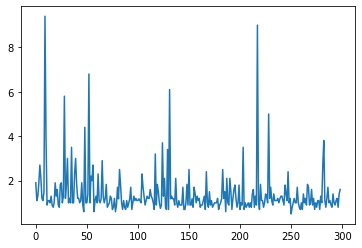

In [ ]:
plt.plot(serum)

In [ ]:
serumWhiskerList = [x.get_ydata()[1] for x in serumPlot['whiskers']]
serumLowerLimit = serumWhiskerList[0]
serumUpperLimit = serumWhiskerList[1]
print(serum.loc[serum>serumUpperLimit].count())

29


In [ ]:
df.loc[df['serum_creatinine']>serumUpperLimit,'serum_creatinine'] = serum.median()

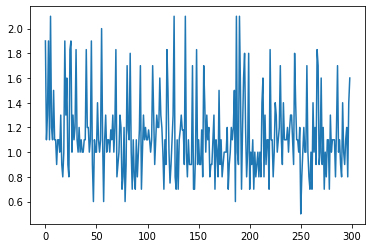

In [ ]:
plt.plot(df['serum_creatinine'])

# Data Exploration


In [ ]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

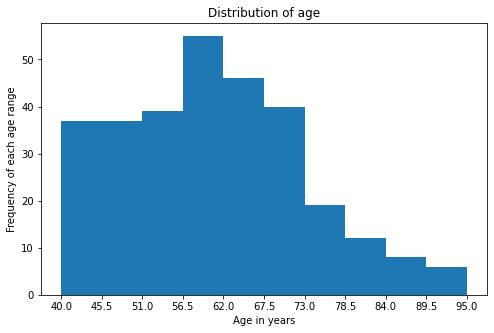

In [ ]:
count, bin_edges = np.histogram(heart_data['age'])
fig = heart_data['age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges).get_figure()

plt.title("Distribution of age")
plt.xlabel('Age in years')
plt.ylabel("Frequency of each age range")
fig.savefig('Distribution of age.png')
plt.show()

# not a guassian distribution

In [ ]:
heart_data['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

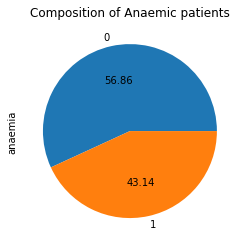

In [ ]:
fig = heart_data['anaemia'].value_counts().plot(kind='pie',autopct='%.2f').get_figure()
plt.title("Composition of Anaemic patients")
fig.savefig('Composition of Anaemic patients.png')
plt.show()

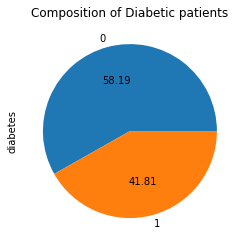

In [ ]:
fig = heart_data['diabetes'].value_counts().plot(kind='pie',autopct='%.2f').get_figure()
plt.title("Composition of Diabetic patients")
fig.savefig('Composition of Diabetic patients.png')
plt.show()

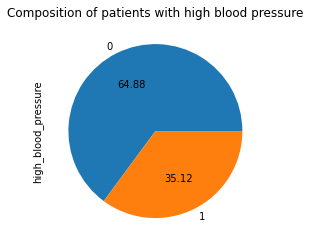

In [ ]:
fig = heart_data['high_blood_pressure'].value_counts().plot(kind='pie',autopct='%.2f').get_figure()
plt.title("Composition of patients with high blood pressure")
fig.savefig('Composition of  patients with high blood pressure.png')
plt.show()

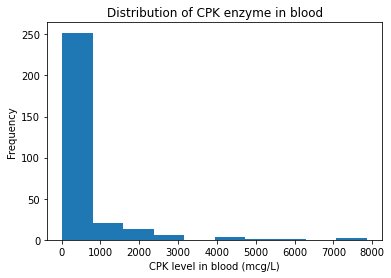

In [ ]:
fig = heart_data['creatinine_phosphokinase'].plot(kind='hist').get_figure()
plt.title("Distribution of CPK enzyme in blood")
plt.xlabel('CPK level in blood (mcg/L)')
plt.ylabel("Frequency")
fig.savefig('Distribution of CPK enzyme in blood.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


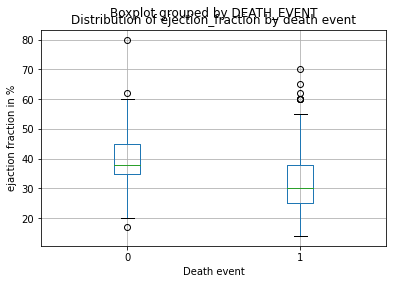

In [ ]:
# people who died - ejaction fraction distribution
fig = heart_data.boxplot(column='ejection_fraction', by = 'DEATH_EVENT').get_figure()
plt.title("Distribution of ejection_fraction by death event")
plt.xlabel('Death event')
plt.ylabel("ejaction fraction in %")
fig.savefig('Distribution of ejection_fraction by death event.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


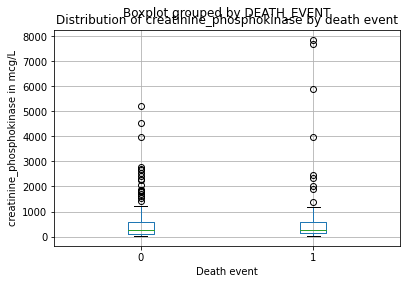

In [ ]:
fig = heart_data.boxplot(column='creatinine_phosphokinase', by = 'DEATH_EVENT').get_figure()
plt.title("Distribution of creatinine_phosphokinase by death event")
plt.xlabel('Death event')
plt.ylabel("creatinine_phosphokinase in mcg/L")
fig.savefig('Distribution of creatinine_phosphokinase by death event.png')
plt.show()

### Exploring platelets column

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
                   
platelets = df['platelets']    
    
ax[0,0].scatter(platelets,df['serum_creatinine'])

ax[0,1].scatter(platelets,df['serum_sodium'])

#%% To be looked upon
sexGrouped = df.groupby('sex')
ax[1,0].boxplot(sexGrouped.get_group(0)['platelets'],positions=[1])
ax[1,0].boxplot(sexGrouped.get_group(1)['platelets'],positions=[1.3])
ax[1,0].set_xticklabels(['Female','Male'])

#%% To be looked upon
smokingGrouped = df.groupby('smoking')
ax[1,1].boxplot(smokingGrouped.get_group(0)['platelets'],positions=[1])
ax[1,1].boxplot(smokingGrouped.get_group(1)['platelets'],positions=[1.3])
ax[1,1].set_xticklabels(['Non-smokers','Smokers'])

fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(df['platelets'],df['time'])

### Exploring serum_creatinine column

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
fig.tight_layout(pad=8)
serum_cret = df['serum_creatinine']


ax[0,0].scatter(df['serum_sodium'],serum_cret)
ax[0,0].set_title("Serum Creatinine VS Serum Sodium",fontsize=16)
ax[0,0].set_xlabel("Serum Sodium",fontsize=14)
ax[0,0].set_ylabel("Serum Creatinine",fontsize=14)
ax[0,0].set_xticks(np.arange(min(df['serum_sodium']), max(df['serum_sodium']+5), 3))
ax[0,0].set_yticks(np.arange(min(df['serum_creatinine']), max(df['serum_creatinine'])+0.1, 0.2))

ax[0,1].boxplot(sexGrouped.get_group(0)['serum_creatinine'],positions=[1])
ax[0,1].boxplot(sexGrouped.get_group(1)['serum_creatinine'],positions=[1.3])
ax[0,1].set_title('Serum Creatinine by Sex',fontsize=16)
ax[0,1].set_xticklabels(['Female','Male'])
ax[0,1].set_xlabel('Sex',fontsize=(14))
ax[0,1].set_ylabel('Serum Creatinine',fontsize=14)

ax[1,0].boxplot(smokingGrouped.get_group(0)['serum_creatinine'],positions=[1])
ax[1,0].boxplot(smokingGrouped.get_group(1)['serum_creatinine'],positions=[1.3])
ax[1,0].set_title('Serum Creatinine by Smoking',fontsize=(16))
ax[1,0].set_xlabel('Smoking',fontsize=(14))
ax[1,0].set_ylabel('Serum Creatinine',fontsize=(14))
ax[1,0].set_xticklabels(['Non-smokers','Smokers'])

ax[1,1].scatter(serum_cret,df['time'])
ax[1,1].set_title("Serum Creatinine VS Time",fontsize=16)
ax[1,1].set_xlabel("Serum Sodium",fontsize=14)
ax[1,1].set_ylabel("Time",fontsize=14)
ax[1,1].set_yticks(np.arange(min(df['time']), max(df['time']+5), 20))
ax[1,1].set_xticks(np.arange(min(df['serum_creatinine']), max(df['serum_creatinine'])+0.1, 0.2))

## Exploring Sex Column

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].boxplot(sexGrouped.get_group(0)['serum_sodium'],positions=[1])
ax[0].boxplot(sexGrouped.get_group(1)['serum_sodium'],positions=[1.3])
ax[0].set_title('Serum Sodium by Sex',fontsize=16)
ax[0].set_xticklabels(['Female','Male'])
ax[0].set_xlabel('Sex',fontsize=(14))
ax[0].set_ylabel('Serum Sodium',fontsize=14)

ax[1].boxplot(smokingGrouped.get_group(0)['serum_sodium'],positions=[1])
ax[1].boxplot(smokingGrouped.get_group(1)['serum_sodium'],positions=[1.3])
ax[1].set_title('Serum Sodium by Smoking',fontsize=(16))
ax[1].set_xlabel('Smoking',fontsize=(14))
ax[1].set_ylabel('Serum Sodium',fontsize=(14))
ax[1].set_xticklabels(['Non-smokers','Smokers'])


fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(df['serum_sodium'],df['time'])
ax.set_title("Serum Sodium VS Time",fontsize=16)
ax.set_xlabel("Serum Sodium",fontsize=14)
ax.set_ylabel("Time",fontsize=14)
ax.set_yticks(np.arange(min(df['time']), max(df['time']+50), 20))
ax.set_xticks(np.arange(min(df['serum_sodium']), max(df['serum_sodium'])+10, 3))

### Exploring smoking column

In [ ]:
smokingGrouped = df.groupby(['smoking','sex'])

fig,ax = plt.subplots(1,2,figsize=(10,10))
fig.tight_layout(pad=5)

ax[0].pie(smokingGrouped.describe()['platelets']['count'].loc[slice(1,1)].values,autopct="          %1.1f%%")
ax[0].legend(['Female','Male'])
ax[0].set_title("Composition of Smokers",fontsize=16)


ax[1].boxplot(sexGrouped.get_group(0)['time'],positions=[1])
ax[1].boxplot(sexGrouped.get_group(1)['time'],positions=[1.3])
ax[1].set_title("Sex VS Time",fontsize=16)
ax[1].set_xlabel("Sex",fontsize=14)
ax[1].set_ylabel("Time",fontsize=14)
ax[1].set_xticklabels(['Female','Male'])

### Exploring with time column

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))

smokingGrouped = df.groupby('smoking')
ax.boxplot(smokingGrouped.get_group(0)['time'],positions=[1])
ax.boxplot(smokingGrouped.get_group(1)['time'],positions=[1.3])
ax.set_title('Serum Sodium by Time',fontsize=(16))
ax.set_xlabel('Smoking',fontsize=(14))
ax.set_ylabel('Time',fontsize=(14))
ax.set_xticklabels(['Non-smokers','Smokers'])

## Exploring with target column

In [ ]:
aliveColumn = df.loc[targetColumn==0]
deadColumn = df.loc[targetColumn==1]

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
fig.tight_layout(pad=5)

for k in range(3):
    ax[k,0].plot(aliveColumn[df.columns[k]],color='green')
    ax[k,0].legend("Alive")
    ax[k,0].set_ylabel(df.columns[k].capitalize(),fontsize=12)
    ax[k,0].set_xlabel("Number of Observations",fontsize=12)
    ax[k,0].set_title("{} of survived patients".format(df.columns[k].capitalize()),fontsize=14)
    
    ax[k,1].plot(deadColumn[df.columns[k]],color='red')
    ax[k,1].legend("Dead")
    ax[k,1].set_ylabel(df.columns[k].capitalize(),fontsize=12)
    ax[k,1].set_xlabel("Number of Observations",fontsize=12)
    ax[k,1].set_title("{} of dead patients".format(df.columns[k].capitalize()),fontsize=14)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
sexGroup = df.groupby(['sex','DEATH_EVENT'])

# Females death ratio
ax[0].pie(sexGroup.describe()['platelets']['count'].loc[slice(0,0)],autopct="  %1.2f%%")
ax[0].legend(['Alive','Dead'])
ax[0].set_title('Females Death Ratio',fontsize=16)

# Male death ratio
ax[1].pie(sexGroup.describe()['platelets']['count'].loc[slice(1,1)],autopct=" %1.2f%%")
ax[1].legend(['Alive','Dead'])
ax[1].set_title('Males Death Ratio',fontsize=16)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
smokeGroup = df.groupby(['smoking','DEATH_EVENT'])

# Females death ratio
ax[0].pie(smokeGroup.describe()['platelets']['count'].loc[slice(0,0)],autopct="  %1.2f%%")
ax[0].legend(['Alive','Dead'])
ax[0].set_title('Non-smoker\'s Death Ratio',fontsize=16)

# Male death ratio
ax[1].pie(smokeGroup.describe()['platelets']['count'].loc[slice(1,1)],autopct=" %1.2f%%")
ax[1].legend(['Alive','Dead'])
ax[1].set_title('Smoker\'s Death Ratio',fontsize=16)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(df.loc[targetColumn==0]['time'],color='green')
ax.plot(df.loc[targetColumn==1]['time'],color='red')
ax.legend(['Alive','Dead'])
ax.set_title("Displaying the follow-up period of dead and alive patients",fontsize=16) 
ax.set_xlabel("No. of Observations",fontsize=14)
ax.set_ylabel("Follow-up period (in days)",fontsize=14)

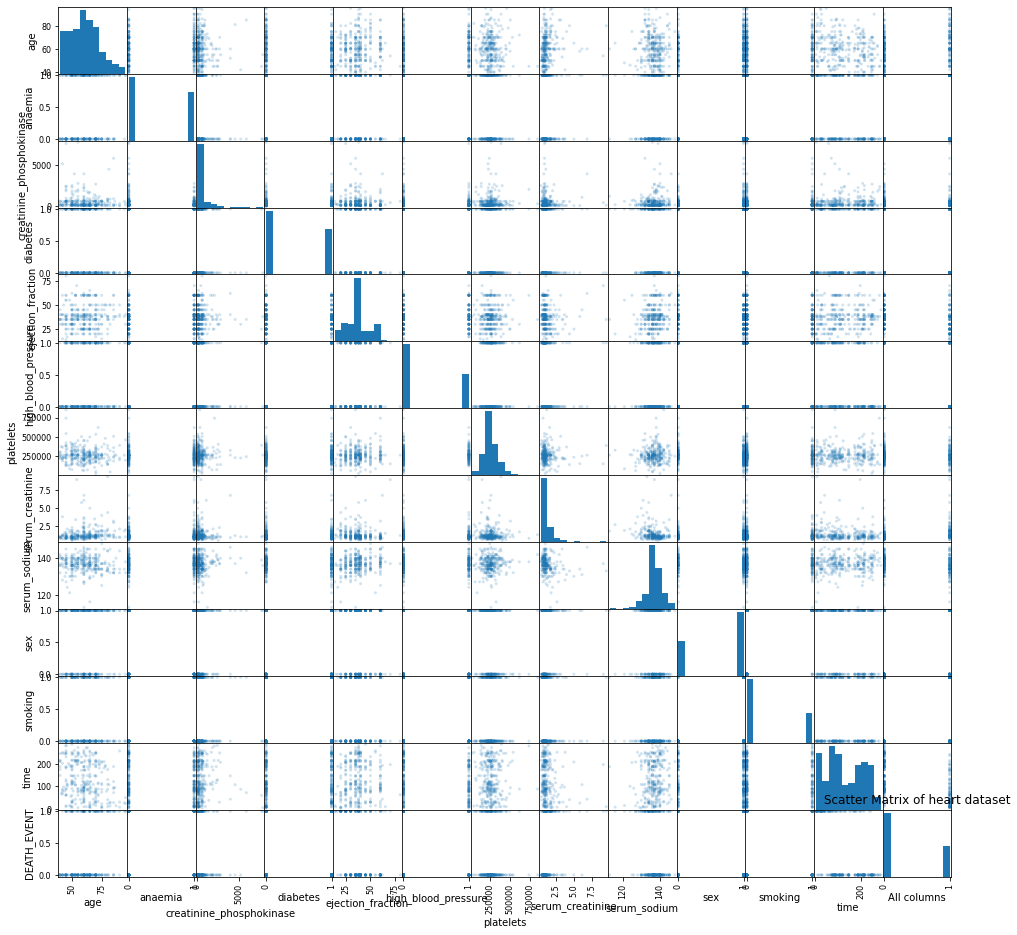

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(heart_data,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.title("Scatter Matrix of heart dataset")
plt.xlabel('All columns')
plt.ylabel("all columns")
plt.show()

# Data Modelling


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# CPK - left skewed to normalise - MinMaxScalar 0 - 100
scaler = MinMaxScaler()
ndarray_heart_data = scaler.fit_transform(heart_data)

In [ ]:
minmax_heart_data = pd.DataFrame(ndarray_heart_data)
minmax_heart_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


In [ ]:
X = minmax_heart_data.iloc[:, :12]

In [ ]:
target = heart_data['DEATH_EVENT']

### Model Selection - kNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2,SelectKBest

#### Hold-out validation 25% test cases

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.25,random_state=4)

In [ ]:
# different values of k, weights = uniform, euclidean distance
for i in range(2,8):
  clf = KNeighborsClassifier(i)
  fit = clf.fit(X_train, y_train)
  predicted = fit.predict(X_test)
  cm = confusion_matrix(y_test, predicted)

  # overall training loss - Return the mean accuracy on the given test data 
  print(" k = {}, accuracy score: {:.5f}".format(i, clf.score(X_test,y_test)))
  #print(classification_report(y_test, predicted))
  #print(cm)

 k = 2, accuracy score: 0.74667
 k = 3, accuracy score: 0.77333
 k = 4, accuracy score: 0.69333
 k = 5, accuracy score: 0.73333
 k = 6, accuracy score: 0.70667
 k = 7, accuracy score: 0.74667


In [ ]:
# different values of k with weigths = distance and Euclidean metric (p=2)
# (closer observation will have more effect on prediction) 
for i in range(2,8):
  clf = KNeighborsClassifier(i, weights="distance")
  fit = clf.fit(X_train, y_train)
  predicted = fit.predict(X_test)
  cm = confusion_matrix(y_test, predicted)

  # overall training loss - Return the mean accuracy on the given test data 
  print(" k = {}, accuracy score: {:.5f}".format(i, clf.score(X_test,y_test)))
  #print(classification_report(y_test, predicted))
  #print(cm)

 k = 2, accuracy score: 0.66667
 k = 3, accuracy score: 0.74667
 k = 4, accuracy score: 0.74667
 k = 5, accuracy score: 0.76000
 k = 6, accuracy score: 0.73333
 k = 7, accuracy score: 0.76000


In [ ]:
# different values of k, weigths = distance (closer observation will have more effect on prediction) 
# and Manhattan metric (p=1)
# high dimension data
for i in range(2,8):
  clf = KNeighborsClassifier(i, weights="distance", metric="minkowski", p=1)
  fit = clf.fit(X_train, y_train)
  predicted = fit.predict(X_test)
  cm = confusion_matrix(y_test, predicted)

  # overall training loss - Return the mean accuracy on the given test data 
  print(" k = {}, accuracy score: {:.5f}".format(i, clf.score(X_test,y_test)))
  #print(classification_report(y_test, predicted))
  #print(cm)

 k = 2, accuracy score: 0.62667
 k = 3, accuracy score: 0.68000
 k = 4, accuracy score: 0.73333
 k = 5, accuracy score: 0.78667
 k = 6, accuracy score: 0.73333
 k = 7, accuracy score: 0.74667


In [ ]:
#feature selection with the best performing kNN model

# shuffle​ package to randomize the order of features
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = X.shape[1]
col_Ind_Random = shuffle(range(0,col_num), random_state=1)



for cur_f in range(0, col_num):
  new_Ind.append(col_Ind_Random[cur_f])
  newData = X.iloc[:, new_Ind].copy()
  X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.25, random_state=0)
  clf = KNeighborsClassifier(5, weights='distance', p=1)
  fit = clf.fit(X_train, y_train)
  cur_Score = clf.score(X_test, y_test)
  if cur_Score < cur_MaxScore:
    new_Ind.remove(col_Ind_Random[cur_f])
  else:
    cur_MaxScore = cur_Score
    print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)) #see if you can get the names of the features printed

print("There are " + str(len(new_Ind)) + " features selected:")

Score with 1 selected features: 0.5866666666666667
Score with 2 selected features: 0.6133333333333333
Score with 3 selected features: 0.64
Score with 4 selected features: 0.64
Score with 5 selected features: 0.68
Score with 6 selected features: 0.8
There are 6 features selected:


In [ ]:
from copy import deepcopy
from tabulate import tabulate
df2 = deepcopy(heart_data)
scaler = StandardScaler()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)

In [ ]:
def createModels(data):
    x_train,x_test,y_train,y_test = train_test_split(data,df2.iloc[:,-1])
    dtc.fit(x_train,y_train)
    knn.fit(x_train,y_train)
    return {'y_test':y_test,'d_pred':dtc.predict(x_test),'k_pred':knn.predict(x_test)}
    
def retAccuracy(y_true,y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    return round((tn+tp)*100/(tn+tp+fp+fn),3)

In [ ]:
def makeAModel(x_train,y_train,y_test):
    accuracy_dict = {}
    for x in range(2,10):
        knn = KNeighborsClassifier(x)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()
#         print("The one for K Nearest is with",x,"neighbors is:",round((tn+tp)*100/(tn+tp+fp+fn),3))
        accuracy_dict[x] = round((tn+tp)*100/(tn+tp+fp+fn),3)
        
    dtc.fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()

#     print("The one for decision tree:",round((tn+tp)*100/(tn+tp+fp+fn),3))
    accuracy_dict['d'] = round((tn+tp)*100/(tn+tp+fp+fn),3)
    return accuracy_dict

## Using all columns

In [ ]:
scaledData = scaler.fit_transform(df2.iloc[:,:-1])

d_li, k_li = [],[]
for x in range(100):
    model_prediction_dict = createModels(scaledData)
    d_li.append(retAccuracy(model_prediction_dict['y_test'], model_prediction_dict['d_pred']))
    k_li.append(retAccuracy(model_prediction_dict['y_test'], model_prediction_dict['k_pred']))
    
print(np.array(d_li).mean())
print(np.array(k_li).mean())

## Checking accuracy with single columns

In [ ]:
column_list = df2.columns.to_list()[:-1]
li=[]
for x in column_list:
    column_mean_d,column_mean_k = [],[]
    scaledData = scaler.fit_transform(heart_data[[x]])
    for y in range(50):
        model_prediction_dict = createModels(scaledData)
        column_mean_d.append(retAccuracy(model_prediction_dict['y_test'], model_prediction_dict['d_pred']))
        column_mean_k.append(retAccuracy(model_prediction_dict['y_test'], model_prediction_dict['k_pred']))
        
    li.append([x,round(np.array(column_mean_d).mean(),2),round(np.array(column_mean_k).mean(),2)])
    
print(tabulate(li,headers=['Column_Name','Accuracy with Decision Tree','Accuracy with KNN']))

## Feature Engineering

In [ ]:
column_mean_d, column_mean_k =[],[]
check_dict={}
for x in range(100):
    df_new = SelectKBest(chi2,k=(x%10)+1).fit_transform(heart_data.iloc[:,:-1],heart_data.iloc[:,-1])
    scaledData = scaler.fit_transform(df_new)
    model_prediction_dict = createModels(scaledData)
    if ((x%10)+1) in check_dict:
        check_dict[((x%10)+1)].append(retAccuracy(model_prediction_dict['y_test'], model_prediction_dict['k_pred']))
    else:
        check_dict[((x%10)+1)]=[]

    
for x in check_dict:
    check_dict[x]=np.array(check_dict[x]).mean()
    
check_dict

In [ ]:
import random

d_accuracy_df = pd.DataFrame(columns=['nColumns','acc'])
k_accuracy_df = pd.DataFrame(columns=['nColumns','k_value','acc'])
i=0
l=0

for k in range(50):
    column_list = df2.columns.to_list()[:-1]
    random.shuffle(column_list)
    column_names=[]
    for x in column_list:
        column_names.append(x)
        scaledData = scaler.fit_transform(df2[column_names])
        x_train,x_test,y_train,y_test = train_test_split(scaledData,df.iloc[:,-1])
        accuracy_dict = makeAModel(x_train,y_train,y_test)
        for j in range(2,10):
            k_accuracy_df.loc[l] = [len(column_names)]+[str(j)]+[accuracy_dict[j]]
            l+=1
        
        d_accuracy_df.loc[i] = [len(column_names)]+[accuracy_dict['d']]
        i+=1

## Plotting observations from feature engineering

In [ ]:
grouped = d_accuracy_df.groupby('nColumns')
plt.plot(np.arange(1,len(column_list)+1),grouped.mean()['acc'],color='black')
plt.title("Accuracy vs Number of Columns",fontsize=16)
plt.xlabel("Number of Columns",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)

In [ ]:
fig,ax = plt.subplots(len(column_list),1,figsize=(7,30))
fig.tight_layout(pad=5)

for x in range(1,len(column_list)+1):
    ax[x-1].plot(grouped.get_group(x)['acc'])
    ax[x-1].set_xticks(np.arange(0,700,50))
    ax[x-1].set_yticks(np.arange(50,100,10))
    ax[x-1].set_title("With "+str(x)+" columns",fontsize=16)
    ax[x-1].set_xlabel("No. of Iterations",fontsize=12)
    ax[x-1].set_ylabel("Accuracy in percentage",fontsize=12)

In [ ]:
groupedKNN = k_accuracy_df.groupby(['nColumns','k_value'])
fig, ax = plt.subplots(len(column_list),1,figsize=(7,60))
fig.tight_layout(pad=5)

mean_list=[]
for j in range(1,len(column_list)+1):
    mean_list=[]
    for i in range(2,10):
        mean_list.append(groupedKNN.get_group((j,str(i))).mean()['acc'])
    ax[j-1].plot(np.arange(2,10), mean_list,color = ['red','blue','yellow','green'][np.random.randint(0,4)])
    ax[j-1].set_xlabel("Number of Neighbors")
    ax[j-1].set_ylabel("Accuracy")
    ax[j-1].set_title("Accuracy with "+str(j)+" column(s)")

## Acquiring featured columns

In [ ]:
scaledData = scaler.fit_transform(df2.loc[:280,['ejection_fraction','serum_creatinine','time']])
model_prediction_dict={}
column_mean_d, column_mean_k =[],[]
max_el_list=[]

for x in range(20):
    check_dict = {}
    for x in range(1,100):
        knn_new = KNeighborsClassifier((x%20)+1,metric="minkowski",p=2)
        x_train,x_test,y_train,y_test = train_test_split(scaledData,df2.iloc[:,-1],random_state=2)
        knn_new.fit(x_train,y_train)
        y_pred = knn_new.predict(x_test)
        if ((x%20)+1) in check_dict:
            check_dict[((x%20)+1)].append(accuracy_score(y_test,y_pred))
        else:
            check_dict[((x%20)+1)]=[]
            
    max_accuracy = 0
    max_el=0
    for x in check_dict:
        check_dict[x]=np.array(check_dict[x]).mean()
        if(check_dict[x]>max_accuracy):
            max_accuracy=check_dict[x]
            max_el=x
    max_el_list.append(max_el)
    
print("The maximum accuracy is",round(max_accuracy*100,2))

max_times=0
max_times_el=0
value_of_k = {}
for i in max_el_list:
    if i not in value_of_k:
        value_of_k[i]=1
    else:
        value_of_k[i]+=1
        if value_of_k[i]>max_times:
            max_times_el=i
            max_times=value_of_k[i]

print("The perfect value for k is",max_times_el)

#### k-fold validation



In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
clf = KNeighborsClassifier(3)

In [ ]:
 for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.21667
[fold 1] score: 0.56667
[fold 2] score: 0.65000
[fold 3] score: 0.78333
[fold 4] score: 0.94915


In [ ]:
clf = KNeighborsClassifier(5)

In [ ]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.10000
[fold 1] score: 0.60000
[fold 2] score: 0.68333
[fold 3] score: 0.75000
[fold 4] score: 0.91525


In [ ]:
clf = KNeighborsClassifier(7)

In [ ]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = target[train_index], target[test_index]
  clf.fit(X_train, y_train)
  print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.13333
[fold 1] score: 0.58333
[fold 2] score: 0.81667
[fold 3] score: 0.75000
[fold 4] score: 0.91525


In [ ]:
kf = KFold(n_splits=7,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
clf = KNeighborsClassifier(3)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.41860
[fold 1] score: 0.41860
[fold 2] score: 0.67442
[fold 3] score: 0.79070
[fold 4] score: 0.74419
[fold 5] score: 0.88095
[fold 6] score: 0.95238


In [ ]:
clf = KNeighborsClassifier(5)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.18605
[fold 1] score: 0.37209
[fold 2] score: 0.62791
[fold 3] score: 0.79070
[fold 4] score: 0.67442
[fold 5] score: 0.90476
[fold 6] score: 0.90476


In [ ]:
clf = KNeighborsClassifier(7)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.16279
[fold 1] score: 0.39535
[fold 2] score: 0.67442
[fold 3] score: 0.81395
[fold 4] score: 0.67442
[fold 5] score: 0.90476
[fold 6] score: 0.90476


In [ ]:
kf = KFold(n_splits=5,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# different values of k with weigths = distance and Euclidean metric (p=2)
# (closer observation will have more effect on prediction) 
clf = KNeighborsClassifier(3, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = target[train_index], target[test_index]
  clf.fit(X_train, y_train)
  print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.21667
[fold 1] score: 0.56667
[fold 2] score: 0.63333
[fold 3] score: 0.78333
[fold 4] score: 0.93220


In [ ]:
clf = KNeighborsClassifier(5, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.11667
[fold 1] score: 0.56667
[fold 2] score: 0.66667
[fold 3] score: 0.75000
[fold 4] score: 0.94915


In [ ]:
clf = KNeighborsClassifier(7, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.11667
[fold 1] score: 0.53333
[fold 2] score: 0.71667
[fold 3] score: 0.75000
[fold 4] score: 0.93220


In [ ]:
kf = KFold(n_splits=7,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
clf = KNeighborsClassifier(3, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.39535
[fold 1] score: 0.41860
[fold 2] score: 0.67442
[fold 3] score: 0.79070
[fold 4] score: 0.74419
[fold 5] score: 0.83333
[fold 6] score: 0.95238


In [ ]:
clf = KNeighborsClassifier(5, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.25581
[fold 1] score: 0.37209
[fold 2] score: 0.65116
[fold 3] score: 0.83721
[fold 4] score: 0.67442
[fold 5] score: 0.90476
[fold 6] score: 0.95238


In [ ]:
clf = KNeighborsClassifier(7, weights="distance")
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.16279
[fold 1] score: 0.39535
[fold 2] score: 0.72093
[fold 3] score: 0.81395
[fold 4] score: 0.69767
[fold 5] score: 0.90476
[fold 6] score: 0.92857


In [ ]:
kf = KFold(n_splits=5,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
clf = KNeighborsClassifier(3, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.20000
[fold 1] score: 0.61667
[fold 2] score: 0.65000
[fold 3] score: 0.75000
[fold 4] score: 0.91525


In [ ]:
clf = KNeighborsClassifier(5, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.15000
[fold 1] score: 0.56667
[fold 2] score: 0.73333
[fold 3] score: 0.75000
[fold 4] score: 0.91525


In [ ]:
clf = KNeighborsClassifier(7, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.13333
[fold 1] score: 0.63333
[fold 2] score: 0.78333
[fold 3] score: 0.76667
[fold 4] score: 0.91525


In [ ]:
kf = KFold(n_splits=7,random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
clf = KNeighborsClassifier(3, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.37209
[fold 1] score: 0.44186
[fold 2] score: 0.72093
[fold 3] score: 0.72093
[fold 4] score: 0.67442
[fold 5] score: 0.83333
[fold 6] score: 0.95238


In [ ]:
clf = KNeighborsClassifier(5, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.30233
[fold 1] score: 0.44186
[fold 2] score: 0.65116
[fold 3] score: 0.81395
[fold 4] score: 0.69767
[fold 5] score: 0.88095
[fold 6] score: 0.92857


In [ ]:
clf = KNeighborsClassifier(7, weights="distance", metric="minkowski", p=1)
for k, (train_index, test_index) in enumerate(kf.split(X)):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = target[train_index], target[test_index]
   clf.fit(X_train, y_train)
   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test,y_test)))

[fold 0] score: 0.20930
[fold 1] score: 0.41860
[fold 2] score: 0.74419
[fold 3] score: 0.81395
[fold 4] score: 0.69767
[fold 5] score: 0.88095
[fold 6] score: 0.92857


## KFold with engineered features

In [ ]:
from sklearn.model_selection import cross_validate,KFold
dtc = DecisionTreeClassifier()

scores = cross_validate(dtc, heart_data.iloc[:,[4,7,11]], heart_data.iloc[:,-1],cv=KFold(n_splits=7))

scores['test_score']*100

### Model Selection - Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,target,test_size=0.3,random_state=0)

In [ ]:
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.7777777777777778


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        62
           1       0.63      0.68      0.66        28

    accuracy                           0.78        90
   macro avg       0.74      0.75      0.75        90
weighted avg       0.78      0.78      0.78        90



In [ ]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, filled=True,rounded=True,special_characters=True)

In [ ]:
graph = graphviz.Source(dot_data, format='png')

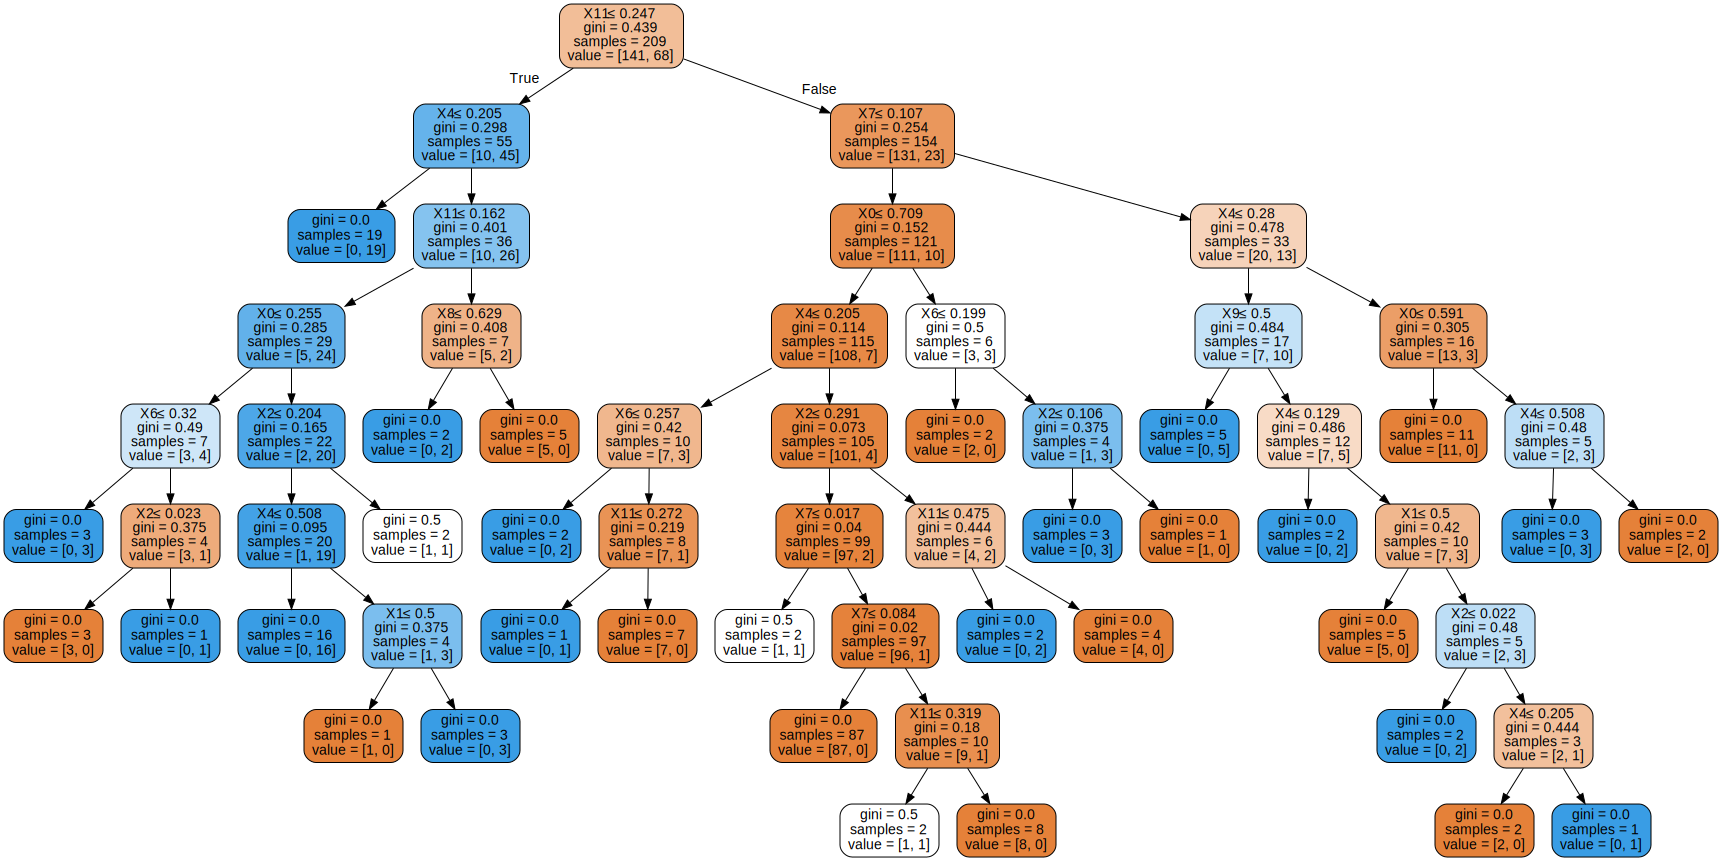

In [ ]:
graph

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,
min_samples_split=3, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.8888888888888888


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90



In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,
min_samples_split=4, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.8888888888888888


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90



In [ ]:
from sklearn import tree
with open('breast_cancer.dot', 'w') as f:
#f =  out_file= ftree.export_graphviz(clf, out_file= ffilled=True,rounded=True,special_characters=True)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,
min_samples_split=8, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.8888888888888888


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90



In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,
min_samples_split=20, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.8888888888888888


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90



In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6,
min_samples_split=3, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.8222222222222222


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.70      0.75      0.72        28

    accuracy                           0.82        90
   macro avg       0.79      0.80      0.80        90
weighted avg       0.83      0.82      0.82        90



In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6,
min_samples_split=3, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.7777777777777778


              precision    recall  f1-score   support

           0       0.84      0.84      0.84        62
           1       0.64      0.64      0.64        28

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.78      0.78      0.78        90



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(heart_data.iloc[:,[4,7,11]]
                                                 ,heart_data.iloc[:,-1],shuffle=True,random_state=2)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4,
min_samples_split=4, min_samples_leaf=1, max_features=None,
max_leaf_nodes=None)
fit = clf.fit(X_train, y_train)

predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(clf.score(X_test,y_test))
print("\n")
print(classification_report(y_test,predicted))

0.9066666666666666


              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.85      0.81      0.83        21

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75

